#### 1. 결정트리와 SVM으로 학습하고 예측을 수행한 후, 각각 혼동행렬, 정확도, 정밀도, 재현율, F1 스코어를 계산하세요

In [4]:
import pandas as pd

data = pd.read_csv('../01.Intro/pima-indians-diabetes.csv',skiprows=9, header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.columns = ['P', 'G', 'BP', 'S', 'I', 'BMI', 'D', 'Age', 'Class']

In [7]:
X = data.drop(['Class'], axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2022
)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

svc = SVC(random_state=2022)
dt = DecisionTreeClassifier(random_state=2022)

svc.fit(X_train, y_train)
dt.fit(X_train, y_train)

pred_svc = svc.predict(X_test)
pred_dt = dt.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
print("SVC SCORE")
print('Confusion Matrix:', confusion_matrix(y_test, pred_svc))
print('Accuracy Score:', accuracy_score(y_test, pred_svc))
print('Recall Score:', recall_score(y_test, pred_svc))
print('Precision Score:', precision_score(y_test, pred_svc))
print('F1 Score:', f1_score(y_test, pred_svc))

SVC SCORE
Confusion Matrix: [[85 15]
 [25 29]]
Accuracy Score: 0.7402597402597403
Recall Score: 0.5370370370370371
Precision Score: 0.6590909090909091
F1 Score: 0.5918367346938775


In [11]:
print("DecisionTree SCORE")
print('Confusion Matrix:', confusion_matrix(y_test, pred_dt))
print('Accuracy Score:', accuracy_score(y_test, pred_dt))
print('Recall Score:', recall_score(y_test, pred_dt))
print('Precision Score:', precision_score(y_test, pred_dt))
print('F1 Score:', f1_score(y_test, pred_dt))

DecisionTree SCORE
Confusion Matrix: [[74 26]
 [21 33]]
Accuracy Score: 0.6948051948051948
Recall Score: 0.6111111111111112
Precision Score: 0.559322033898305
F1 Score: 0.5840707964601771


#### 2. 결정트리에서 max_depth, min_sample_splits, min_sample_leaf 값을 하나씩 선택해서 tree 그림을 그려보세요

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

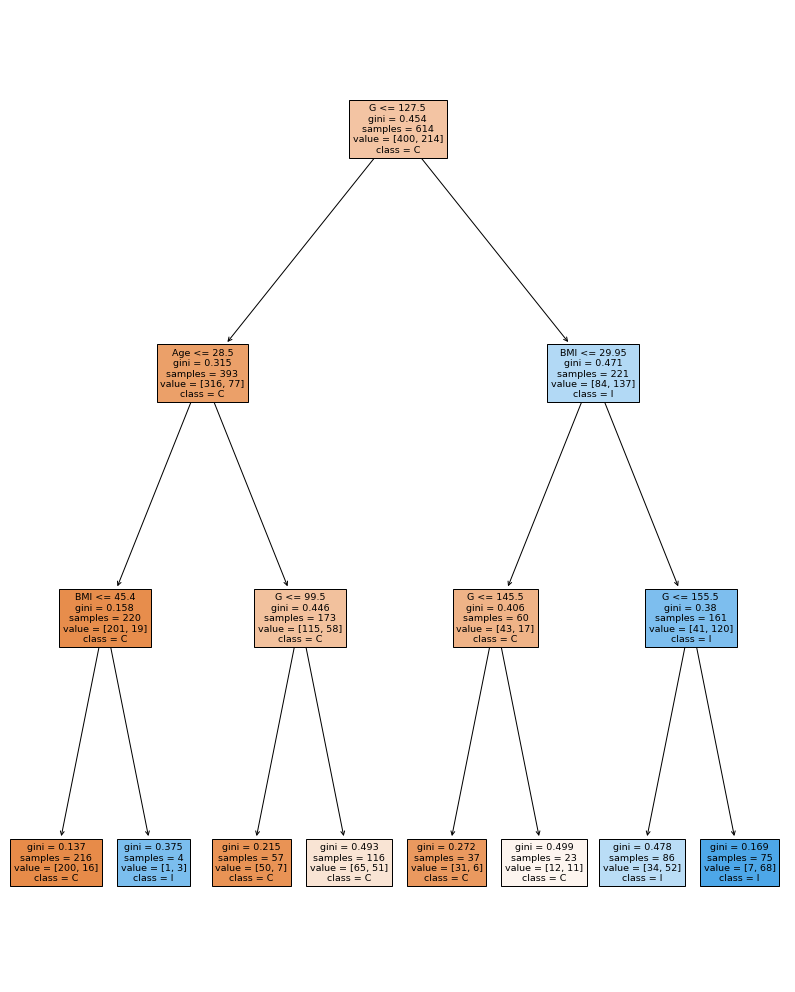

In [15]:
dt_2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_2.fit(X_train, y_train)

plt.figure(figsize=(14, 18))
plot_tree(dt_2, feature_names=X.columns, class_names = 'Class', filled=True)
plt.show()

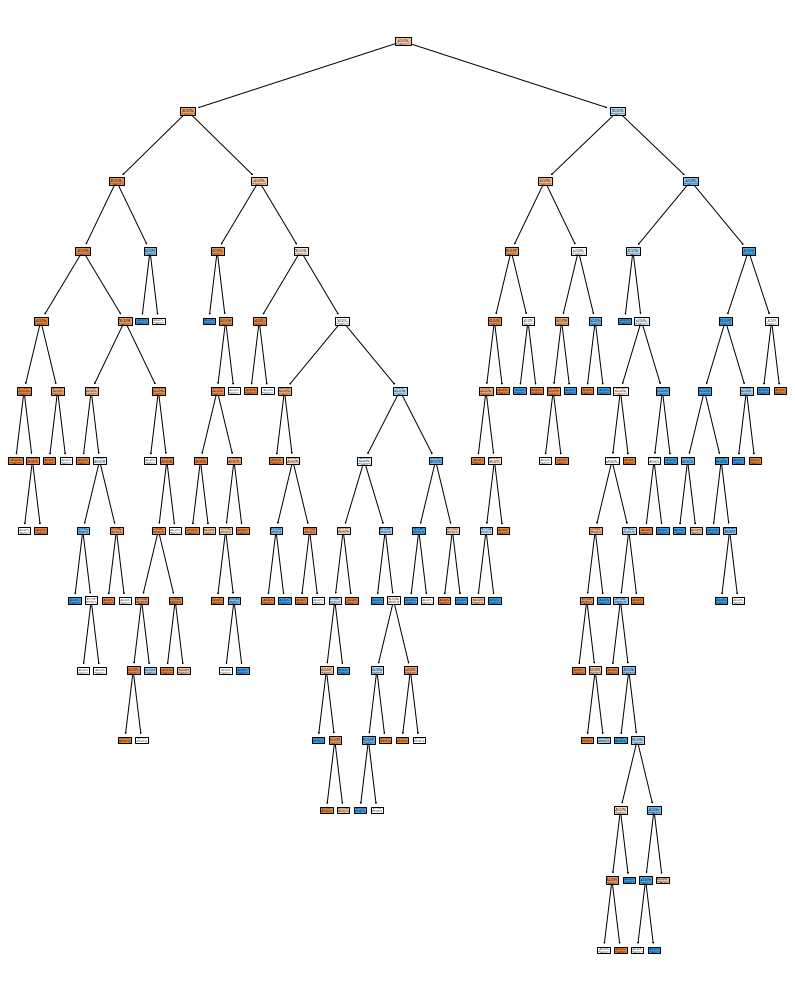

In [16]:
dt_3 = DecisionTreeClassifier(min_samples_leaf=2, random_state=156)
dt_3.fit(X_train, y_train)

plt.figure(figsize=(14, 18))
plot_tree(dt_3, feature_names=X.columns, class_names = 'Class', filled=True)
plt.show()

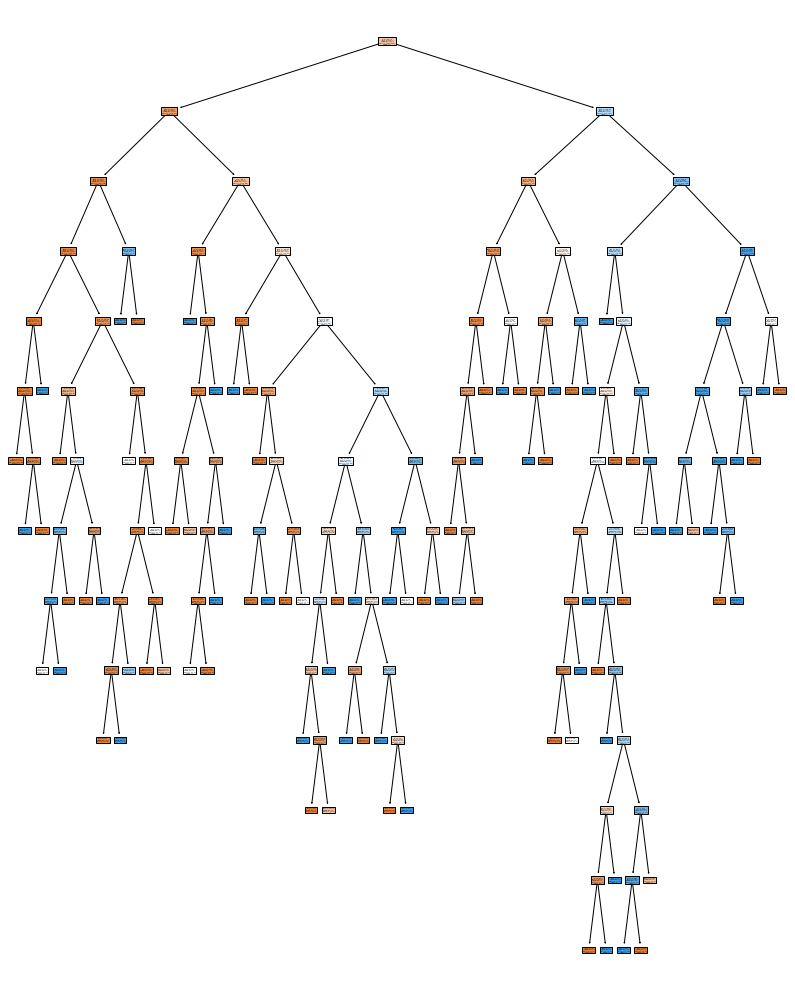

In [17]:
dt_4 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_4.fit(X_train, y_train)

plt.figure(figsize=(14, 18))
plot_tree(dt_4, feature_names=X.columns, class_names = 'Class', filled=True)
plt.show()

#### 3. 두 가지 모델에 대해서 GridSearchCV를 수행해 Best가 되는 경우의 파라미터 값과 그 때의 정확도를 계산하세요

In [24]:
from sklearn.model_selection import GridSearchCV

params_dt = {'max_depth': [3, 5, 7],
        'min_samples_leaf': [3, 4, 5, 6, 7],
        'min_samples_split': [2, 4, 6]}

params_svc = {'C':[0.01, 0.1, 1, 10, 100]}

In [25]:
gv_dt = GridSearchCV(dt, params_dt, scoring='accuracy', cv=5)
gv_svc = GridSearchCV(svc, params_svc, scoring='accuracy', cv=5)

gv_dt.fit(X_train, y_train)
gv_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2022),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [26]:
print("Decision Tree's best params:",gv_dt.best_params_)
print("SVC's best params:",gv_svc.best_params_)

Decision Tree's best params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
SVC's best params: {'C': 1}


In [29]:
gv_dt.best_estimator_.score(X_test, y_test), gv_svc.best_estimator_.score(X_test, y_test)

(0.6818181818181818, 0.7402597402597403)